# WFST-based Machine Translation Tiny Demo
## for Intern3 Students
by Ye Kyaw Thu, Lab Leader, LST Lab., Myanmar  
Date: 18 July 2025

FST မောဒယ်တွေကို visualization လုပ်ဖို့ ရည်ရွယ်တာမို့ ဗမာစာကြောင်း ဆယ်ကြောင်း၊ ရခိုင်စာကြောင်း ဆယ်ကြောင်း ကိုပဲ သုံးပြီး WFST basd machine translation demo လုပ်သွားပါမယ်။  

## Notes

WFST ကိုအခြေခံတဲ့ machine translation (MT) ကို လက်တွေ့လုပ်ပြတဲ့ notebook ပါ။  
OpenFST နဲ့ MT evaluation အတွက် BLEU score, ChrF++ score တွက်တဲ့ ပရိုဂရမ်တွေကိုလည်း ကိုယ့် local machine ထဲမှာ ကြိုတင်ပြင်ဆင်ထားရပါလိမ့်မယ်။  
Parallel corpus လည်း ကလည်း ဗမာ-ရခိုင်အတွက် ဆိုရင် ဗမာ-ရခိုင်၊ ဗမာ-ထားဝယ် အတွက် ဆိုရင်လည်း ဗမာ-ထားဝယ် ပြင်ဆင်ထားရပါလိမ့်မယ်။  

Machine translation သုတေသနက တကယ်ကို ကျယ်ပြန့်တာမို့ အခု ဒီလက်တွေ့ သင်ခန်းစာမှာက WFST ကိုသုံးပြီး လုပ်တဲ့ MT အပိုင်းကိုပဲ အဓိကထားပြောသွားပါမယ်။  

## Data Preparation  


In [40]:
cd /home/ye/exp/tiny_mt/alignment/

/home/ye/exp/tiny_mt/alignment


In [41]:
%%writefile train.my
ဘယ် အချိန် လဲ
ဘာ ပြော သလဲ
ဘာ လုပ် သလဲ
မင်း ဘာ မေး မှာလဲ
မင်း ဘာ ချက် လဲ
အချိန် ရှိ လား
ဘယ် အိမ် မှာ မင်း နေ သလဲ
သူ ဘယ်မှာ နေ လဲ
မင်း ဘာ အကြံပေး ချင် သလဲ
မင်း ဘာ တွေ စီမံ မှာလဲ

Overwriting train.my


In [42]:
!cat train.my

ဘယ် အချိန် လဲ
ဘာ ပြော သလဲ
ဘာ လုပ် သလဲ
မင်း ဘာ မေး မှာလဲ
မင်း ဘာ ချက် လဲ
အချိန် ရှိ လား
ဘယ် အိမ် မှာ မင်း နေ သလဲ
သူ ဘယ်မှာ နေ လဲ
မင်း ဘာ အကြံပေး ချင် သလဲ
မင်း ဘာ တွေ စီမံ မှာလဲ


In [43]:
%%writefile train.rk
ဇာ ချိန် လေး
ဇာ ပြော လေး
ဇာ လုပ် လေး
မင်း ဇာ မိန်း ဖို့လေး
မင်း ဇာ ချက် လေး
အချိန် ဟိ လား
ဇာ အိမ် မှာ မင်း နီ လေး
ယင်းသူ ဇာမာ နီ လေး 
မင်း ဇာ အကြံပီး ချင် လေး
မင်း ဇာ တိ စီမံ ဖို့လေး

Overwriting train.rk


In [44]:
!cat train.rk

ဇာ ချိန် လေး
ဇာ ပြော လေး
ဇာ လုပ် လေး
မင်း ဇာ မိန်း ဖို့လေး
မင်း ဇာ ချက် လေး
အချိန် ဟိ လား
ဇာ အိမ် မှာ မင်း နီ လေး
ယင်းသူ ဇာမာ နီ လေး 
မင်း ဇာ အကြံပီး ချင် လေး
မင်း ဇာ တိ စီမံ ဖို့လေး


## Alignment

MT အတွက် alignment ကလည်း အရေးကြီးတဲ့အပိုင်းပါ။ သုတေသနတွေ အများကြီး လုပ်ခဲ့ကြ၊ လုပ်နေကြပါတယ်။  
ဒီ Lab exercise အတွက်က Anymalign ဆိုတဲ့ alignment tool ကို သုံးပါမယ်။  

Link: [https://anymalign.limsi.fr/](https://anymalign.limsi.fr/)  

### anymalign.sh

Alignment လုပ်ဖို့အတွက် သုံးခဲ့တဲ့ shell script က အောက်ပါအတိုင်းပါ။  

In [45]:
!cat ./anymalign.sh

#!/bin/bash -v

SOURCE=$1;
TARGET=$2;

time python2.7 /home/ye/tool/anymalign/anymalign.py  -i 5 -a 5 -w ./train.$SOURCE ./train.$TARGET > alignment-train.txt
wc ./alignment-train.txt

head ./alignment-train.txt
tail ./alignment-train.txt

cut -f1 ./alignment-train.txt > train-equal-smt.$SOURCE
cut -f2 ./alignment-train.txt > train-equal-smt.$TARGET

head ./train-equal-smt.$SOURCE
head ./train-equal-smt.$TARGET

tail ./train-equal-smt.$SOURCE
tail ./train-equal-smt.$TARGET

wc ./train-equal-smt.$SOURCE
wc ./train-equal-smt.$TARGET

echo "Alignment path:"
pwd;




## Alignment


In [46]:
!wc train.my train.rk

 10  40 448 train.my
 10  40 467 train.rk
 20  80 915 total


**Commandline ကနေပဲ alignment လုပ်ပြမယ်**  
-a 5 က alignment က 5 per second ဆိုရင် ရပ်ပစ်လိုက်ဖို့  
-t 60 (60 sec ပြည့်တာနဲ့ ရပ်ခိုင်း)    
-w to get lexical weight    

အသေးစိတ်က anymalign.py ကို --help option နဲ့ run  ပြီး လေ့လာပါ။  

In [47]:
!time python2.7 /home/ye/tool/anymalign/anymalign.py --help

Usage: (basic usage)
    python anymalign.py corpus.source corpus.target >translationTable.txt

For more control:
    python anymalign.py [INPUT_FILE[.gz|.bz2] [...]] >ALIGNMENT_FILE
    python anymalign.py -m [ALIGNMENT_FILES[.gz|.bz2] [...]] >ALIGNMENT_FILE

INPUT_FILE is a tab separated list of aligned sentences (1/line):
<sentenceNlanguage1> [<TAB> <sentenceNlanguage2> [...]]

A generated ALIGNMENT_FILE has the same format as INPUT_FILE (same
fields), plus three extra fields at the end of each line:
1) a space-separated list of lexical weights (1/language);
2) a space-separated list of translation probabilities (1/language);
3) an absolute frequency:
<phraseNlanguage1> [...] <TAB> <lexWeights> <TAB> <probas> <TAB> <frequency>

ALIGNMENT_FILES is the concatenation of several ALIGNMENT_FILE's.

Check out http://users.info.unicaen.fr/~alardill/anymalign/ for more!

Options:
  --version             show program's version number and exit
  -h, --help            show this help message an

Manual တခေါက် run ကြည့်ရအောင်...  

In [48]:
!time python2.7 /home/ye/tool/anymalign/anymalign.py -i 5 -a 5 -w ./train.my ./train.rk > alignment-train.txt

Input corpus: 2 languages, 10 lines
Aligning... (ctrl-c to interrupt)
(13615 subcorpora, avg=3.16) Alignment done, proceeding... 
Computing word cooccurrences...
Computing lexical weights...
108 alignments
Sorting alignments
Computing conditional probabilities...
Outputting results...
100%
real	0m2.039s
user	0m2.033s
sys	0m0.006s


**Alignment လုပ်ပြီးထွက်လာတဲ့ output ဖိုင်ကို လေ့လာကြည့်ရအောင်**  

In [49]:
!wc ./alignment-train.txt

  108  1083 10766 ./alignment-train.txt


**Statistical Machine Translation (SMT) မှာ သုံးတဲ့ phrase table ပါပဲ။**  

In [50]:
!cat ./alignment-train.txt

မင်း	မင်း	1.000000 1.000000	0.885179 0.985707	48414
မင်း ဘာ	မင်း ဇာ	1.000000 0.750000	0.985405 0.883006	47398
အချိန် ရှိ လား	အချိန် ဟိ လား	0.500000 1.000000	1.000000 0.956985	35040
ဘာ လုပ် သလဲ	ဇာ လုပ် လေး	1.000000 0.428571	0.988822 1.000000	32465
ဘယ် အချိန် လဲ	ဇာ ချိန် လေး	0.500000 0.107143	0.967509 1.000000	32428
ဘာ ပြော သလဲ	ဇာ ပြော လေး	1.000000 0.428571	0.988264 1.000000	32337
သူ ဘယ်မှာ နေ လဲ	ယင်းသူ ဇာမာ နီ လေး	1.000000 0.428571	0.924981 1.000000	31096
ဘယ် အိမ် မှာ မင်း နေ သလဲ	ဇာ အိမ် မှာ မင်း နီ လေး	1.000000 0.357143	0.951807 1.000000	31027
မင်း ဘာ တွေ စီမံ မှာလဲ	မင်း ဇာ တိ စီမံ ဖို့လေး	1.000000 0.750000	1.000000 1.000000	30104
မင်း ဘာ အကြံပေး ချင် သလဲ	မင်း ဇာ အကြံပီး ချင် လေး	1.000000 0.428571	0.993559 1.000000	29615
မင်း ဘာ ချက် လဲ	မင်း ဇာ ချက် လေး	1.000000 0.428571	1.000000 1.000000	29554
မင်း ဘာ မေး မှာလဲ	မင်း ဇာ မိန်း ဖို့လေး	1.000000 0.750000	1.000000 1.000000	29429
ဘာ	ဇာ	1.000000 0.750000	1.000000 0.937768	25135
နေ	နီ လေး	1.000000 0.285714	0.841866 0.932468	13863
အကြံပေး ချင်

shell script ထဲမှာ ရေးထားတဲ့ အလုပ်အကုန်ပြီးသွားတဲ့အခါမှာ အောက်ပါအတိုင်း ဖိုင်တွေရလိမ့်မယ်။  

In [51]:
!pwd

/home/ye/exp/tiny_mt/alignment


In [52]:
!./anymalign.sh my rk

#!/bin/bash -v

SOURCE=$1;
TARGET=$2;

time python2.7 /home/ye/tool/anymalign/anymalign.py  -i 5 -a 5 -w ./train.$SOURCE ./train.$TARGET > alignment-train.txt
Input corpus: 2 languages, 10 lines
Aligning... (ctrl-c to interrupt)
(13454 subcorpora, avg=3.17) Alignment done, proceeding... 
Computing word cooccurrences...
Computing lexical weights...
108 alignments
Sorting alignments
Computing conditional probabilities...
Outputting results...
100%
real	0m2.035s
user	0m2.022s
sys	0m0.013s
wc ./alignment-train.txt
  108  1083 10766 ./alignment-train.txt

head ./alignment-train.txt
မင်း	မင်း	1.000000 1.000000	0.885918 0.985898	48170
မင်း ဘာ	မင်း ဇာ	1.000000 0.750000	0.985423 0.882477	46578
အချိန် ရှိ လား	အချိန် ဟိ လား	0.500000 1.000000	1.000000 0.957970	34918
ဘာ ပြော သလဲ	ဇာ ပြော လေး	1.000000 0.428571	0.988101 1.000000	31971
ဘာ လုပ် သလဲ	ဇာ လုပ် လေး	1.000000 0.428571	0.988000 1.000000	31697
ဘယ် အချိန် လဲ	ဇာ ချိန် လေး	0.500000 0.107143	0.967797 1.000000	31526
ဘယ် အိမ် မှာ မင်း နေ သလဲ	ဇာ အိမ် မ

In [75]:
!ls *

alignment-train.txt  test.my	       train-equal-smt.my  train.my
anymalign.sh	     train-equal-smt.  train-equal-smt.rk  train.rk


In [76]:
!wc train.{my,rk}

 10  40 448 train.my
 10  40 467 train.rk
 20  80 915 total


## Test Data Preparation

test data ကို စာကြောင်း တစ်ကြောင်းတည်းနဲ့ပဲ ပြင်ဆင်ပါမယ်။  

In [53]:
%%writefile test.my
ဘယ် အချိန် ဘာ လုပ် သလဲ

Overwriting test.my


ရခိုင် ဘာသာစကားအတွက် test စာကြောင်းကိုလည်း ပြင်မယ်။  

In [54]:
%%writefile test.rk
ဇာ ချိန် ဇာ လုပ် လေး

Overwriting test.rk


In [55]:
!wc test.{my,rk}

  1   5  59 test.my
  1   5  53 test.rk
  2  10 112 total


## Preparation for MT Folder

MT ကို my-rk ဖိုလ်ဒါထဲမှာ run ပါမယ်။  
WFST MT လုပ်ဖို့အတွက် ကြိုရေးထားတဲ့ perl, python, shell script တွေကို အဲဒီ my-rk ဖိုလ်ဒါအောက်ထဲကို ကော်ပီကူးယူပါမယ်။  
အထက်က alignment လုပ်ပြီး ထွက်လာတဲ့ ဖိုင်ကနေ source column, target column နှစ်ခုကိုပဲ ဖြတ်ယူပါမယ်။  

In [81]:
!pwd

/home/ye/exp/tiny_mt/alignment


In [57]:
cd ../

/home/ye/exp/tiny_mt


In [86]:
mkdir my-rk

In [87]:
!ls

alignment  my-rk


In [88]:
!cp /home/ye/exp/wfst_mt/my-rk/*.sh ./my-rk/

In [59]:
!ls ./my-rk/*sh

./my-rk/eval.sh			  ./my-rk/test-nofstdraw.sh
./my-rk/mk-train-symbol.sh	  ./my-rk/test.sh
./my-rk/mk-uniq-word.sh		  ./my-rk/train-test-eval.sh
./my-rk/multi-test.sh		  ./my-rk/translate-nofstdraw.sh
./my-rk/shortest-path-to-line.sh  ./my-rk/translate.sh


In [90]:
!cp /home/ye/exp/wfst_mt/my-rk/*.py ./my-rk/

In [60]:
!ls ./my-rk/*.py

./my-rk/align_ibm.py		   ./my-rk/mk_fst_format.py
./my-rk/extract_column_symbols.py  ./my-rk/mk-symbol.py
./my-rk/make_ngram_fst.py


**ရှေ့က run ခဲ့တဲ့ anymalign.sh နဲ့ ဖြတ်ထားပြီးသားမို့လို့ filename ပြောင်းပြီး ကော်ပီကူးယူပါမယ်**

In [94]:
!cp ./alignment/train-equal-smt.my ./my-rk/all.my

In [95]:
!cp ./alignment/train-equal-smt.rk ./my-rk/all.rk

မြင်သာအောင် parallel data or aligned data ကို head command နဲ့ ကြည့်ရအောင်။  

In [61]:
!head ./my-rk/all.my

မင်း
မင်း ဘာ
အချိန် ရှိ လား
ဘာ ပြော သလဲ
ဘာ လုပ် သလဲ
ဘယ် အချိန် လဲ
သူ ဘယ်မှာ နေ လဲ
ဘယ် အိမ် မှာ မင်း နေ သလဲ
မင်း ဘာ တွေ စီမံ မှာလဲ
မင်း ဘာ ချက် လဲ


In [62]:
!head ./my-rk/all.rk

မင်း
မင်း ဇာ
အချိန် ဟိ လား
ဇာ ပြော လေး
ဇာ လုပ် လေး
ဇာ ချိန် လေး
ယင်းသူ ဇာမာ နီ လေး
ဇာ အိမ် မှာ မင်း နီ လေး
မင်း ဇာ တိ စီမံ ဖို့လေး
မင်း ဇာ ချက် လေး


## Move to MT Folder and Check Programs  

Machine Translation စမ်းသပ်မှုလုပ်မယ့် folder အောက်ထဲမှာ alignment လုပ်ထားတဲ့ parallel data တွေအပြင် WFST-based MT လုပ်ဖို့အတွက် ပရိုဂရမ်တချို့ကို ကြိုပြင်ဆင်ထားရပါမယ်။ (အထက်မှာ ပြထားတဲ့ ဥပမာ အတိုင်း)    
အဓိက OpenFST command တွေကိုတော့ bash shell script ထဲမှာပဲရေးထားပြီး run ပါတယ်။   

In [98]:
cd ./my-rk

/home/ye/exp/tiny_mt/my-rk


## Note

တကယ် corpus အကြီးနဲ့ WFST MT ကို run တဲ့အခါမှာ open test data က parallel corpus ထဲကနေ သပ်သပ်ဖယ်ထားရတာပါ။ အဲဒါကြောင့် symbol ဖိုင်ဆောက်တဲ့အခါမှာ unknown word တွေကို သီးသန့်ကိုင်တွယ်တာမလုပ်ချင်လို့ training + test data ကို ပေါင်းပြီး all.my (i.e. source), all.rk (i.e. target) အဖြစ် ဖိုင်အသစ်တွေ ဆောက်ပါတယ်။ သို့သော် ဒီ small corpus နဲ့ run တဲ့ ဒီမိုမှာတော့ အဲဒီလိုတွေ သီးသန့် ပြင်မနေတော့ပဲ train-equal-smt.my, train-equal-smt.rk ကနေပဲ ကူးယူလိုက်တာပါ။ WFST MT အတွက် ရေးထားတဲ့ shell script မှာတော့ ခွဲသုံးတာကို တွေ့ရပါလိမ့်မယ်။  


In [64]:
cd /home/ye/exp/tiny_mt/my-rk/

/home/ye/exp/tiny_mt/my-rk


In [102]:
!cp ../alignment/train-equal-smt.* .

## Test Data

Alignment folder အောက်မှာ ပြင်ခဲ့တဲ့ test data ဖိုင်ကိုလည်း my-rk/ အောက်ကို ကော်ပီကူးယူမယ်။  

In [105]:
!cp ../alignment/test.* .

## train-test-eval.sh

Alignment လုပ်ထားတဲ့ parallel corpus နဲ့ ဒီ train-test-eval.sh shell script ကို run လိုက်ရုံနဲ့ training, testing, evaluation အကုန်လုပ်ပေးသွားပါလိမ့်မယ်။

```bash
#!/bin/bash

# Prepare oneline test data
# head က ပုဒ်မ တစ်ခုတည်းဖြစ်နေလို့ tail ကို သုံးဖို့ ဆုံးဖြတ်လိုက်တယ်
tail -n 1 ./train-equal-smt.my > oneline.my

# Building Transducers with training data (i.e. language model, translation model, composing etc.)
time ./translate-nofstdraw.sh ./train-equal-smt.my ./train-equal-smt.rk oneline.my ./all.my ./all.rk ./all.rk

# Testing with WFST MT
time ./multi-test.sh ./all.my ./all.rk ./test.my 2>&1 | tee anymaTrainingDataOnly-test-myrk.log1

# Evaluation
time ./eval.sh ./test.rk hyp.txt.clean
```

## translate-nofstdraw.sh  

nofstdraw ဆိုတာက OpenFST framework ရဲ့ command တခုဖြစ်တဲ့ fstdraw နဲ့ graph ပုံတွေ မထုတ်ပဲ run ခိုင်းတာပါ။ ဒေတာက များရင် PDF သို့မဟုတ် png ဖိုင်နဲ့ ကြည့်ရင် အဆင်မပြေလို့ပါ။   

In [65]:
cd /home/ye/exp/tiny_mt/my-rk/

/home/ye/exp/tiny_mt/my-rk


./translate-nofstdraw.sh က အောက်ပါအတိုင်းပါ။ တကယ့် experiment လုပ်တုန်းက သုံးခဲ့တာမို့ တချို့ comment တွေနဲ့ရှုပ်နေတာတွေ ရှိပါတယ်။ ဒါတောင် တော်တော်လေး ဖျက်စရာရှိတာတွေ ဖျက်ထားတဲ့ ဗားရှင်းပါ။  

```bash
#!/bin/bash
set -e

# written by Ye Kyaw Thu, LU Lab., Myanmar
# before running this shell script, you have to run "mk-train-symbol.sh" for both source and target trainining files
# Build FST Translation Model and test witn one line example:
# $ ./translate-nofstdraw.sh ./train.my ./train.ro ./oneline.my ./all.my ./all.ro

corpuse=$1;
corpusf=$2;
input=$3;

# open testing လုပ်တဲ့အခါမှာ symbol တွေက မရှိရင် error တက်လို့ ...
allsource=$4;
alltarget=$5;

# Create symbol file for target language
echo "Create symbol file for target language ...";
./mk-uniq-word.sh $corpusf > $corpusf.words
#perl ./mk-symbol.pl ./$corpusf.words > $corpusf.words.sym
python ./mk-symbol.py --input $corpusf.words --output $corpusf.words.sym

# Create symbol file
#echo "Create symbol file for source language ...";
#./mk-uniq-word.sh $corpuse > $corpuse.words
#python ./mk-symbol.py --input $corpusf.words --output $corpusf.words.sym

# Prepare test data FST
#perl ./mk-fst-format.pl $input > $input.formatted
python ./mk_fst_format.py --input $input --output $input.formatted
inputfst=$input.formatted
echo "Preparing test data FST finished!"
echo "Test sentence:"; cat $input;

# Create a bigram language model from the corpus
python make_ngram_fst.py < $corpusf --n 2 > bigram.txt
python extract_column_symbols.py --column 2 < bigram.txt > bigram.isym
fstcompile --keep_isymbols --keep_osymbols --isymbols=bigram.isym --osymbols=bigram.isym bigram.txt bigram.fst
echo "fstcompile for the bigram language model FST finished!"
#fstdraw --portrait --acceptor --show_weight_one --ssymbols=$corpuse.words.sym bigram.fst bigram.dot
#dot -Tps:cairo bigram.dot > bigram.ps
#ps2pdf bigram.ps
#pdfcrop bigram.pdf
#mv bigram-crop.pdf bigram.pdf
#evince ./bigram.pdf

# for translation model
python align_ibm.py --source $corpuse --target $corpusf --output onetoone.txt
# try to cover open test symbol ... 
python align_ibm.py --source $allsource --target $alltarget --output all_src_trg.txt
python extract_column_symbols.py --column 2 < all_src_trg.txt > onetoone.isym
python extract_column_symbols.py --column 3 < all_src_trg.txt > onetoone.osym

fstcompile --keep_isymbols --keep_osymbols --isymbols=onetoone.isym --osymbols=onetoone.osym onetoone.txt onetoone.fst
echo "fstcompile for the translation model FST finished!"
#fstdraw --portrait --acceptor --show_weight_one onetoone.fst onetoone.dot
#dot -Tps:cairo onetoone.dot > onetoone.ps
#ps2pdf onetoone.ps
#pdfcrop onetoone.pdf
#mv onetoone-crop.pdf onetoone.pdf
#evince onetoone.pdf

# Compose together a translation model and languge model
#fstcompile --keep_isymbols --keep_osymbols --isymbols=train.my.words.sym --osymbols=bigram.isym onetoone.txt | fstarcsort --sort_type=olabel > onetoone.fst
#fstcompose onetoone.fst bigram.fst composed.fs	t
fstcompile --keep_isymbols --keep_osymbols --isymbols=onetoone.isym --osymbols=bigram.isym onetoone.txt | fstarcsort --sort_type=olabel > onetoone.fst
echo "compile success!!";

fstcompose onetoone.fst bigram.fst composed.fst
echo "fstcompose together a translation model and language model finished!"
#fstdraw --portrait --show_weight_one composed.fst composed.dot
#dot -Tps:cairo composed.dot > composed.ps
#ps2pdf composed.ps
#pdfcrop composed.pdf
#mv composed-crop.pdf composed.pdf
#evince composed.pdf

# Formulate the input as a WFST
fstcompile --keep_isymbols --keep_osymbols --isymbols=onetoone.isym --osymbols=onetoone.isym $inputfst ${inputfst%.*}.fst

echo "fstcompile for the input sentence finished!"
#fstdraw --portrait --acceptor ${inputfst%.*}.fst ${inputfst%.*}.dot
#dot -Tps:cairo ${inputfst%.*}.dot > ${inputfst%.*}.ps
#ps2pdf ${inputfst%.*}.ps
#pdfcrop ${inputfst%.*}.pdf
#mv ${inputfst%.*}-crop.pdf ${inputfst%.*}.pdf
#evince ${inputfst%.*}.pdf

# Compose together into a search graph
fstcompose ${inputfst%.*}.fst composed.fst search.fst
echo "fstcompose together into a search graph finished!"
#fstdraw --portrait search.fst search.dot
#dot -Tps:cairo search.dot > search.ps
#ps2pdf search.ps
#pdfcrop search.pdf
#mv search-crop.pdf search.pdf
#evince ./search.pdf

# Remove epsilons to make it easier to read
fstrmepsilon search.fst searchrmeps.fst
echo "fstrmepsilon finished!"
#fstdraw --portrait searchrmeps.fst searchrmeps.dot
#dot -Tps:cairo searchrmeps.dot > searchrmeps.ps
#ps2pdf searchrmeps.ps
#pdfcrop searchrmeps.pdf
#mv searchrmeps-crop.pdf searchrmeps.pdf
#evince ./searchrmeps.pdf

# Print the shortest path
fstshortestpath ./searchrmeps.fst > shortest-path.fst
echo "finding the shortest path finished!"
fstdraw --portrait --isymbols=onetoone.isym  --osymbols=$corpusf.words.sym ./shortest-path.fst | dot -Tpdf -Gsize=6,3 -Eheadport=e -Etailport=w > shortest-path.pdf

#evince ./shortest-path.pdf

# Shortest-path to normal sentence
bash ./shortest-path-to-line.sh ./shortest-path.fst
```

**train-test-eval.sh ကို run တာက corpus ရဲ့ ပမာဏပေါ် မူတည်ပြီး ကြာပါလိမ့်မယ်။ ဒီတခါ ကတော့ စာကြောင်း ၁၀ကြောင်း parallel corpus မို့လို့ မြန်ပါလိမ့်မယ်...**  

In [68]:
!./train-test-eval.sh

Create symbol file for target language ...
Preparing test data FST finished!
Test sentence:
အချိန် လဲ
fstcompile for the bigram language model FST finished!
fstcompile for the translation model FST finished!
compile success!!
fstcompose together a translation model and language model finished!
fstcompile for the input sentence finished!
fstcompose together into a search graph finished!
fstrmepsilon finished!
finding the shortest path finished!
ဇာ ချိန် </s> 
real	0m0.257s
user	0m0.196s
sys	0m0.082s
mv hyp.txt hyp.old
Translation: ဘယ် အချိန် ဘာ လုပ် သလဲ
hypothesis file: hyp.txt.clean

real	0m0.084s
user	0m0.062s
sys	0m0.027s
Evaluation with BLEU score:
BLEU = 100.00, 100.0/100.0/100.0/100.0 (BP=1.000, ratio=1.000, hyp_len=5, ref_len=5)
Evaluation with chrF++ score:
start_time:	1752815850
c6+w2-F2	100.0000
c6+w2-avgF2	100.0000
end_time:	1752815850

real	0m0.024s
user	0m0.017s
sys	0m0.007s


အထက်မှာ မြင်ရတဲ့အတိုင်းပါပဲ BLEU score က 100.00 ရပါတယ်။ Known word တွေနဲ့ပဲ ပြီးတော့ တစ်ကြောင်းထဲကို ဘာသာပြန်ခိုင်းတာ မို့လို့ပါ။ လက်တွေ့ machine translation လုပ်တဲ့အခါမှာတော့ ဒီလိုမျိုး score က မဖြစ်နိုင်ပါဘူး။  

## Let's Run Step by Step  

အထက်မှာ run ပြခဲ့တာက Transducer model ဆောက်တာကနေ test data နဲ့ translate လုပ်ပြီး evaluation လုပ်သွားတဲ့ အဆင့်အကုန်လုံးပါပဲ။ အဲဒါကြောင့် လက်ရှိ ပြဖို့ ဒီမိုအတွက် WFST based translation pipeline တစ်ခုလုံးက အဆင်ပြေတယ်၊ ဘာ error မှ မရှိနိုင်တော့ဘူး ဆိုတာ သေချာသွားပါပြီ။ ခုချိန်က စပြီး အရေးကြီးတဲ့ အဆင့် တစ်ဆင့်ချင်းစီကို command ပေး run သွားရင်းနဲ့ FST တွေကို graph အနေနဲ့ ထုတ်ကြည့်ရင်း လေ့လာသွားကြရအောင်။  

## Create Symbol File For Target Language

In [69]:
!pwd

/home/ye/exp/tiny_mt/my-rk


In [73]:
# Target language က ရခိုင်ဘာသာစကားမို့လို့ train-equal-smt.rk ဖိုင်ကို သုံးပါမယ်
!echo "Create symbol file for target language ...";
!./mk-uniq-word.sh train-equal-smt.rk > train-equal-smt.rk.words
#!perl ./mk-symbol.pl ./train-equal-smt.rk.words > train-equal-smt.rk.words.sym
!python ./mk-symbol.py --input ./train-equal-smt.rk.words --output train-equal-smt.rk.words.sym

Create symbol file for target language ...


Target language အတွက် ရလာတဲ့ symbol ဖိုင်ကို ရိုက်ထုတ်ကြည့်ရအောင်။  

In [74]:
!cat train-equal-smt.rk.words.sym

<s> 0
NULL 1
ချက် 2
ချင် 3
ချိန် 4
စီမံ 5
ဇာ 6
ဇာမာ 7
တိ 8
နီ 9
ပြော 10
ဖို့လေး 11
မင်း 12
မိန်း 13
မှာ 14
ယင်းသူ 15
လား 16
လုပ် 17
လေး 18
ဟိ 19
အကြံပီး 20
အချိန် 21
အိမ် 22
</s> 23


## Create Symbol File for Source Language

In [75]:
# Create symbol file
#echo "Create symbol file for source language ...";
!./mk-uniq-word.sh train-equal-smt.my > train-equal-smt.my.words
#!perl ./mk-symbol.pl ./train-equal-smt.my.words > train-equal-smt.my.words.sym
!python ./mk-symbol.py --input ./train-equal-smt.my.words --output train-equal-smt.my.words.sym

Source အတွက် ပြင်ဆင်ထားတဲ့ symbol ဖိုင်ကို ရိုက်ထုတ်ကြည့်ရအောင်။  

In [76]:
!cat ./train-equal-smt.my.words.sym

<s> 0
NULL 1
ချက် 2
ချင် 3
စီမံ 4
တွေ 5
နေ 6
ပြော 7
ဘယ် 8
ဘယ်မှာ 9
ဘာ 10
မင်း 11
မေး 12
မှာ 13
မှာလဲ 14
ရှိ 15
လား 16
လုပ် 17
လဲ 18
သလဲ 19
သူ 20
အကြံပေး 21
အချိန် 22
အိမ် 23
</s> 24


## Notes

လက်တွေ့ WFST နဲ့ test ဖိုင်တစ်ဖိုင်လုံးကို ဘာသာပြန်တဲ့အခါ စာကြောင်းရေ ရှိရင် ရှိသလောက် အချိန်ကြာပါတယ်။ အဲဒါကြောင့် အရင်ဆုံး oneline.my ဆိုတဲ့ စာကြောင်း တစ်ကြောင်းထဲ closed data ကို ပြင်ပြီးမှ စမ်းကြည့်ပါတယ်။ အဲဒီအဆင့်မှာတင် fail ဖြစ်သွားရင် ပြင်စရာရှိတာ ပြင်နိုင်အောင်လို့ပါ။ သို့သော်လည်း လက်ရှိ ဒီမိုပြဖို့ ပြင်ထားတဲ့ test data ကလည်း graph ထုတ်ပြီးကြည့်ရင် အရမ်းမများအောင်လို့ တကယ်တမ်းမှာတော့ တစ်ကြောင်းတည်းနဲ့ပဲ translation လုပ်မှာပါပဲ။   

## multi-test.sh

multi-test.sh ဖိုင်က အောက်ပါအတိုင်းပါ။  

```bash
#!/bin/bash

# written by Ye Kyaw Thu, LU Lab., Myanmar
# e.g. $ ./multi-test.sh all.my all.ro head.my
#

source=$1;
target=$2;
testdata=$3;

# Backup original hyp file
echo "mv hyp.txt hyp.old";
mv hyp.txt hyp.old

cat $testdata | while read -r line
do
    echo "Translation: "${line};
    echo ${line} > ./oneline-test
    #Ref: ./test.sh ./sl.my ./sl.ro ./oneline-tail.ro
#    ./test.sh $source $target ./oneline-test
    ./test-nofstdraw.sh $source $target ./oneline-test

    #Reordering
    tmpline=$(fstprint ./shortest-path.fst | tac | cut -f4 | tr '\n' ' ' | awk 'BEGIN {FS=" ";OFS=" "} {print $NF; for(i=1;i<NF-1;++i) print $i;}' | tr '\n' ' ')

    #writing to hyp.txt
    if test -z "$tmpline"
    then
        echo ${line} >> hyp.txt
    else
        echo "$tmpline" >> hyp.txt
    fi

done

sed "s/ <\/s> //;" ./hyp.txt > hyp.txt.clean
echo "hypothesis file: hyp.txt.clean"
```


တကယ်က multi-test.sh ကလည်း test data ဖိုင်ထဲမှာရှိတဲ့ စာကြောင်း တစ်ကြောင်းချင်းစီကို ဖတ်ပြီး အောက်ပါအတိုင်း `test-nofstdraw.sh` ကိုပဲ pass လုပ်ပြီး translation လုပ်သွားတာ ဖြစ်ပါတယ်။  

```./test-nofstdraw.sh $source $target ./oneline-test```

WFST MT ရဲ့ အရေးကြီးတဲ့ အပိုင်းတွေအားလုံးက ဒီ `test-nofstdraw.sh` ဖိုင်ထဲမှာပါပဲ။    

## Build Bigram LM

In [83]:
# Create a bigram language model from the corpus
!python make_ngram_fst.py --input all.rk --output bigram.txt --n 2
!python extract_column_symbols.py --column 2 --input bigram.txt --output bigram.isym

!fstcompile --keep_isymbols --keep_osymbols --isymbols=bigram.isym --osymbols=bigram.isym bigram.txt bigram.fst
!echo "fstcompile for the bigram language model FST finished!"

fstcompile for the bigram language model FST finished!


In [84]:
cd /home/ye/exp/tiny_mt/my-rk/

/home/ye/exp/tiny_mt/my-rk


In [85]:
!python make_ngram_fst.py < all.rk > bigram.txt
!python extract_column_symbols.py --column 2 --input bigram.txt --output bigram.isym
!fstcompile --keep_isymbols --keep_osymbols --isymbols=bigram.isym --osymbols=bigram.isym bigram.txt bigram.fst
!echo "fstcompile for the bigram language model FST finished!"

fstcompile for the bigram language model FST finished!


In [86]:
!fstdraw --portrait --isymbols=./bigram.isym --osymbols=./bigram.isym ./bigram.fst | dot -Tpdf  -Gmargin=0 > ./bigram.pdf 

In [87]:
!pdfcrop bigram.pdf bigram_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `bigram_cropped.pdf'.


In [88]:
!convert -density 800 bigram_cropped.pdf -quality 100 bigram_cropped.png

In [89]:
from IPython.display import Image
Image(filename="bigram_cropped.png")

## Build IBM Model-1 or One-to-One Translation FST 

align_ibm.py code ကို လေ့လာကြည့်ရအောင်...

In [90]:
!python align_ibm.py --help

usage: align_ibm.py [-h] --source SOURCE --target TARGET [--output OUTPUT]
                    [--model {1}] [--version]

Train IBM Model 1 aligner and output in FST format.

options:
  -h, --help            show this help message and exit
  --source SOURCE, -s SOURCE
                        Source language file
  --target TARGET, -t TARGET
                        Target language file
  --output OUTPUT, -o OUTPUT
                        Output file for FST format (default: stdout)
  --model {1}, -m {1}   IBM model version (only Model 1 supported)
  --version             show program's version number and exit


IBM Model-1 က မြန်မာ-ရခိုင်လို spoken dialogue အတွက် အတိုင်းအတာ တစ်ခုထိ အလုပ်လုပ်ပေးပါတယ်။  

```python
"""
IBM Alignment Model-1
Written by Ye Kyaw Thu.
Last updated: 18 July 2025
"""

import math
import argparse
from collections import defaultdict
from typing import List, Tuple, TextIO


def read_parallel_corpus(src_file: TextIO, tgt_file: TextIO) -> Tuple[List[List[str]], List[List[str]]]:
    src_lines = [line.strip().split() for line in src_file]
    tgt_lines = [line.strip().split() for line in tgt_file]
    if len(src_lines) != len(tgt_lines):
        raise ValueError(f"Line count mismatch: source={len(src_lines)} target={len(tgt_lines)}")
    return src_lines, tgt_lines


def train_ibm_model_1(src_sents: List[List[str]], tgt_sents: List[List[str]]) -> Tuple[defaultdict, defaultdict]:
    joint_counts = defaultdict(int)
    tgt_counts = defaultdict(int)

    for src, tgt in zip(src_sents, tgt_sents):
        for f in src:
            for e in tgt:
                joint_counts[f, e] += 1
                tgt_counts[e] += 1

    return joint_counts, tgt_counts


def write_fst_output(joint_counts: defaultdict, tgt_counts: defaultdict, output: TextIO):
    for (f, e), count in joint_counts.items():
        prob = count / tgt_counts[e]
        logprob = 0 if prob == 1 else -math.log(prob)
        print(f"0 0 {f} {e} {logprob:.4f}", file=output)
    print("0 0 </s> </s> 0", file=output)
    print("0", file=output)


def main():
    parser = argparse.ArgumentParser(
        description="Train IBM Model 1 aligner and output in FST format."
    )
    parser.add_argument('--source', '-s', type=argparse.FileType('r'), required=True,
                        help="Source language file")
    parser.add_argument('--target', '-t', type=argparse.FileType('r'), required=True,
                        help="Target language file")
    parser.add_argument('--output', '-o', type=argparse.FileType('w'), default='-',
                        help="Output file for FST format (default: stdout)")
    parser.add_argument('--model', '-m', choices=['1'], default='1',
                        help="IBM model version (only Model 1 supported)")
    parser.add_argument('--version', action='version', version='IBMAligner 1.0')

    args = parser.parse_args()

    try:
        src_sents, tgt_sents = read_parallel_corpus(args.source, args.target)
    except ValueError as e:
        print(f"[ERROR] {e}", file=args.output)
        exit(1)

    joint_counts, tgt_counts = train_ibm_model_1(src_sents, tgt_sents)
    write_fst_output(joint_counts, tgt_counts, args.output)


if __name__ == '__main__':
    main()


```

In [91]:
!python align_ibm.py --source all.my --target all.rk --output onetoone.txt

In [92]:
!cat onetoone.txt

0 0 မင်း မင်း 1.3863
0 0 မင်း ဇာ 2.1203
0 0 ဘာ မင်း 2.1665
0 0 ဘာ ဇာ 1.6503
0 0 အချိန် အချိန် 1.6094
0 0 အချိန် ဟိ 1.6094
0 0 အချိန် လား 1.6094
0 0 ရှိ အချိန် 0.9163
0 0 ရှိ ဟိ 0.9163
0 0 ရှိ လား 0.9163
0 0 လား အချိန် 0.9163
0 0 လား ဟိ 0.9163
0 0 လား လား 0.9163
0 0 ဘာ ပြော 1.2528
0 0 ဘာ လေး 2.0260
0 0 ပြော ဇာ 3.7297
0 0 ပြော ပြော 0.7419
0 0 ပြော လေး 3.1246
0 0 သလဲ ဇာ 2.3434
0 0 သလဲ ပြော 1.4351
0 0 သလဲ လေး 2.0260
0 0 ဘာ လုပ် 1.2528
0 0 လုပ် ဇာ 3.7297
0 0 လုပ် လုပ် 0.7419
0 0 လုပ် လေး 3.1246
0 0 သလဲ လုပ် 1.4351
0 0 ဘယ် ဇာ 2.8824
0 0 ဘယ် ချိန် 1.1896
0 0 ဘယ် လေး 2.9014
0 0 အချိန် ဇာ 3.4420
0 0 အချိန် ချိန် 0.9383
0 0 အချိန် လေး 3.1246
0 0 လဲ ဇာ 3.2189
0 0 လဲ ချိန် 1.1896
0 0 လဲ လေး 2.0260
0 0 သူ ယင်းသူ 1.1787
0 0 သူ ဇာမာ 1.1787
0 0 သူ နီ 3.0123
0 0 သူ လေး 4.5109
0 0 ဘယ်မှာ ယင်းသူ 1.1787
0 0 ဘယ်မှာ ဇာမာ 1.1787
0 0 ဘယ်မှာ နီ 3.0123
0 0 ဘယ်မှာ လေး 4.5109
0 0 နေ ယင်းသူ 1.4663
0 0 နေ ဇာမာ 1.4663
0 0 နေ နီ 1.4028
0 0 နေ လေး 2.7191
0 0 လဲ ယင်းသူ 1.8718
0 0 လဲ ဇာမာ 1.8718
0 0 လဲ နီ 3.0123
0 0 ဘယ်

Input symbol file ဆောက်မယ်။  

In [93]:
!python extract_column_symbols.py --column 2 < onetoone.txt > onetoone.isym

Output symbol file ဆောက်မယ်။

In [94]:
!python extract_column_symbols.py --column 3 < onetoone.txt > onetoone.osym

In [95]:
!fstcompile --isymbols onetoone.isym --osymbols onetoone.osym --keepisymbols --keeposymbols onetoone.txt > onetoone.all.fst

In [96]:
!fstdraw --portrait --isymbols=onetoone.isym --osymbols=onetoone.osym ./onetoone.fst | dot -Tpdf  -Gmargin=0 > ./onetoone.pdf 

In [97]:
!pdfcrop onetoone.pdf onetoone_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `onetoone_cropped.pdf'.


In [100]:
!convert -density 1000 onetoone_cropped.pdf -quality 100 onetoone_cropped.png

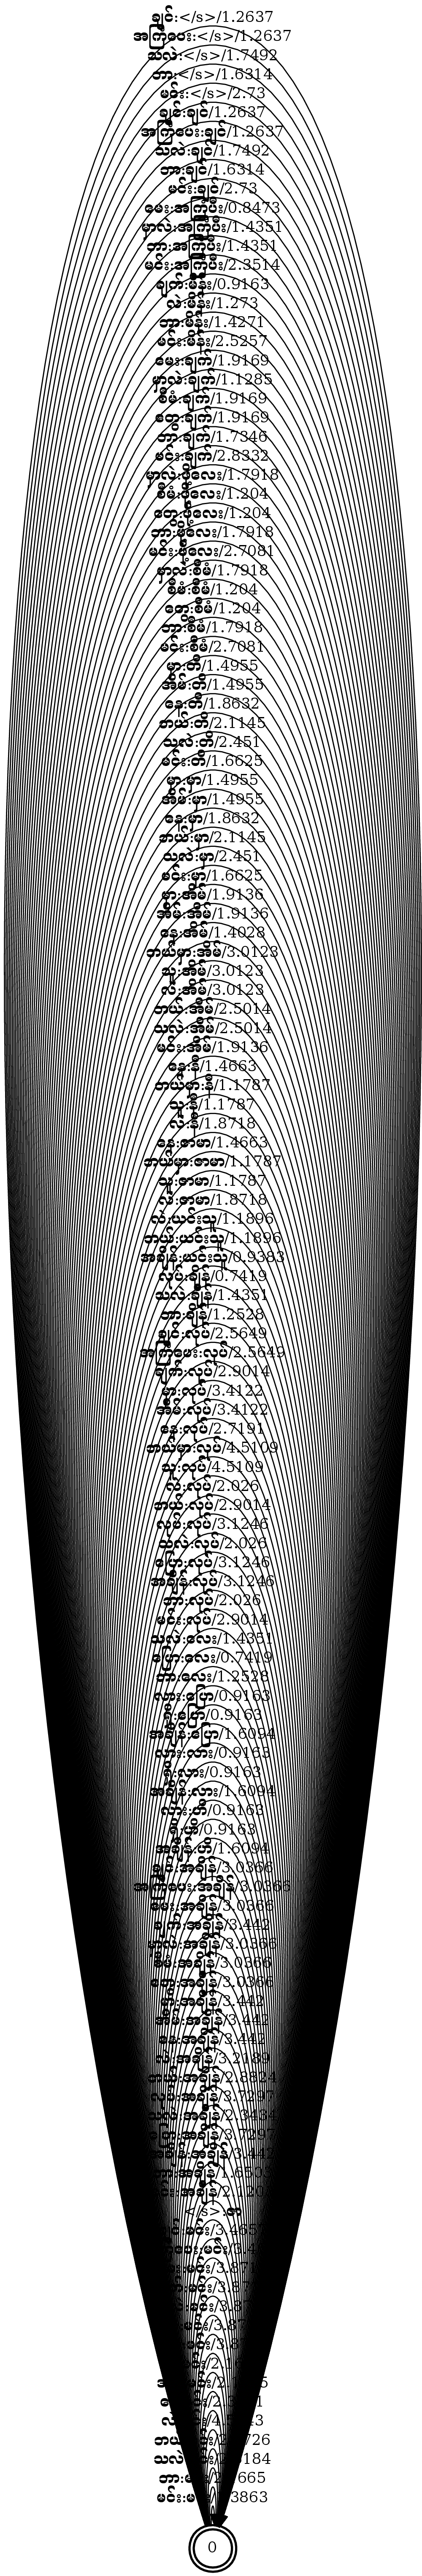

In [101]:
from IPython.display import Image
#Image(filename="onetoone_cropped.png", height=100, width=300)
Image(filename="onetoone_cropped.png")

In [102]:
!cat onetoone.all.isym

<eps> 0
မင်း 1
ဘာ 2
အချိန် 3
ရှိ 4
လား 5
ပြော 6
သလဲ 7
လုပ် 8
ဘယ် 9
လဲ 10
သူ 11
ဘယ်မှာ 12
နေ 13
အိမ် 14
မှာ 15
တွေ 16
စီမံ 17
မှာလဲ 18
ချက် 19
မေး 20
အကြံပေး 21
ချင် 22
</s> 23


In [103]:
!fstcompose onetoone.fst bigram.fst composed.fst  
!echo "fstcompose together a translation model and language model finished!"

fstcompose together a translation model and language model finished!


In [104]:
!fstdraw --portrait ./composed.fst | dot -Tpdf  -Gmargin=0 > ./composed.pdf 

In [105]:
!pdfcrop composed.pdf composed_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `composed_cropped.pdf'.


In [106]:
#!convert pos_lm_cropped.pdf pos_lm_cropped.png
!convert -density 1000 composed_cropped.pdf -quality 100 composed_cropped.png

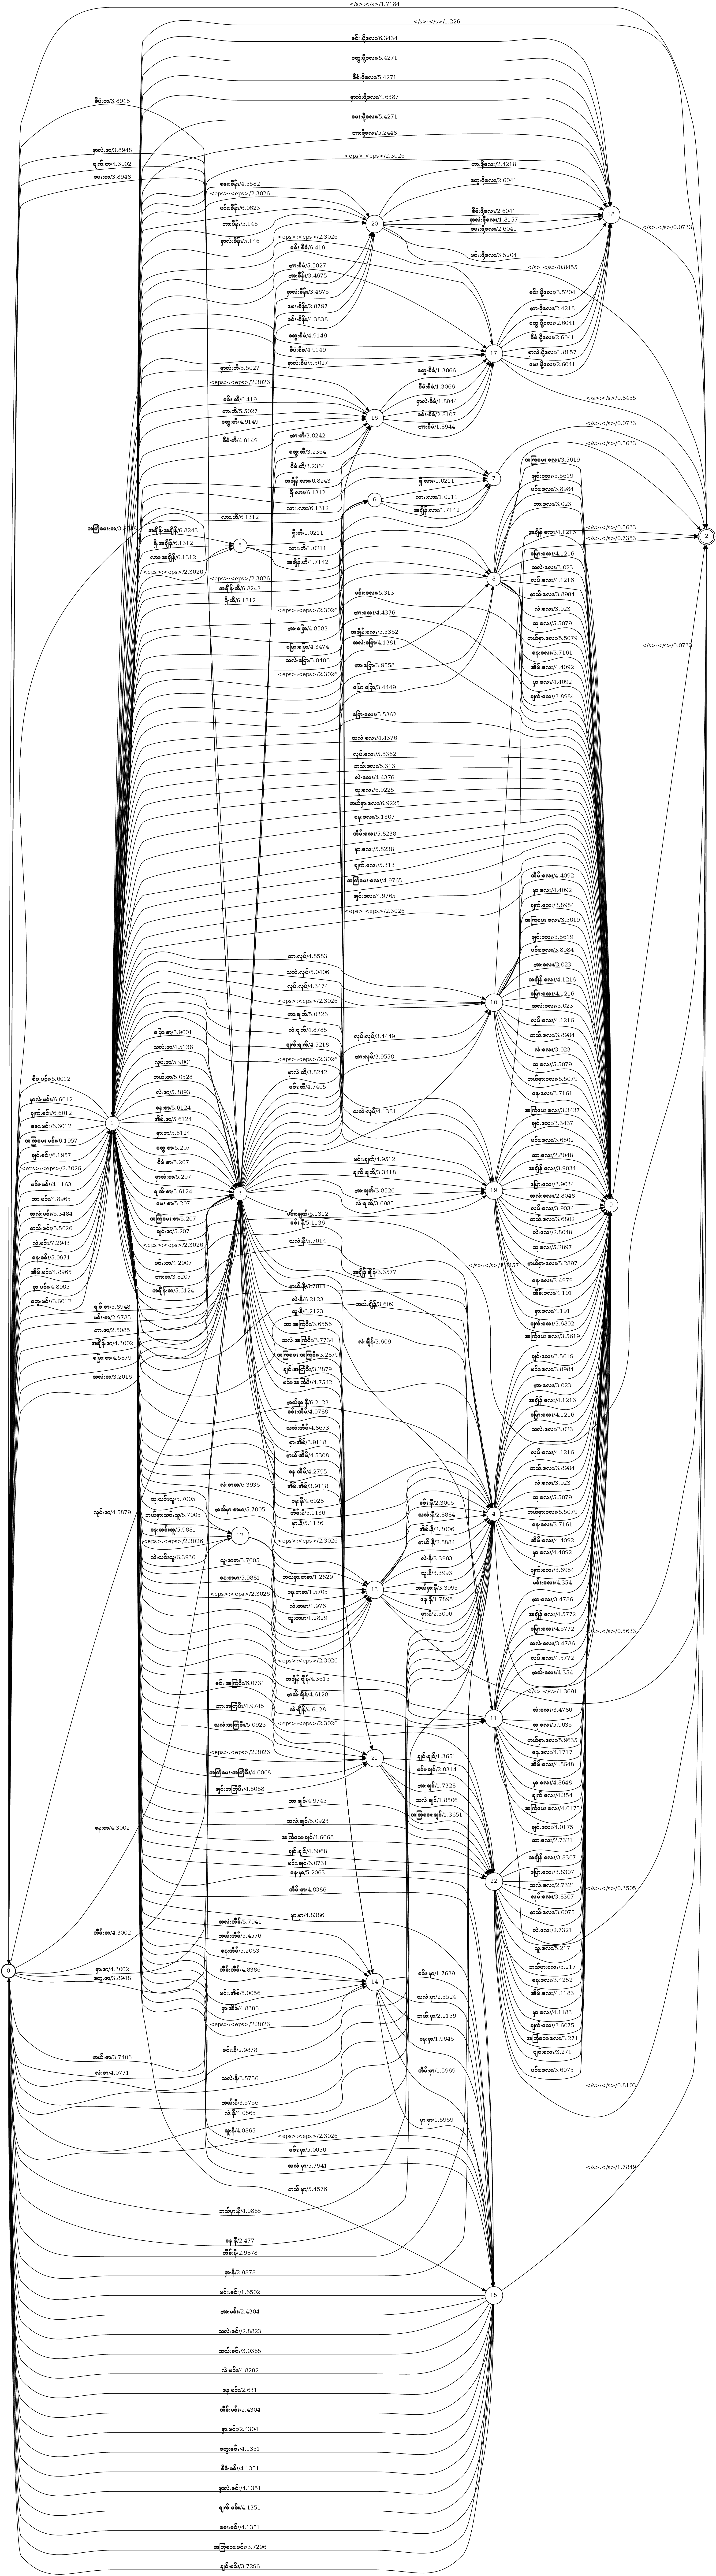

In [107]:
Image(filename="composed_cropped.png")

## search.fst, searchrmeps.fst, shortest-path.fst

Input ဝင်လာတဲ့ စာကြောင်း တစ်ကြောင်းချင်းစီအတွက် shortest-path ကို ရှာရပါတယ်။  

In [110]:
!fstdraw --portrait ./search.fst | dot -Tpdf  -Gmargin=0 > ./search.pdf 

In [111]:
!pdfcrop search.pdf search_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `search_cropped.pdf'.


In [112]:
#!convert pos_lm_cropped.pdf pos_lm_cropped.png
!convert -density 1000 search_cropped.pdf -quality 100 search_cropped.png

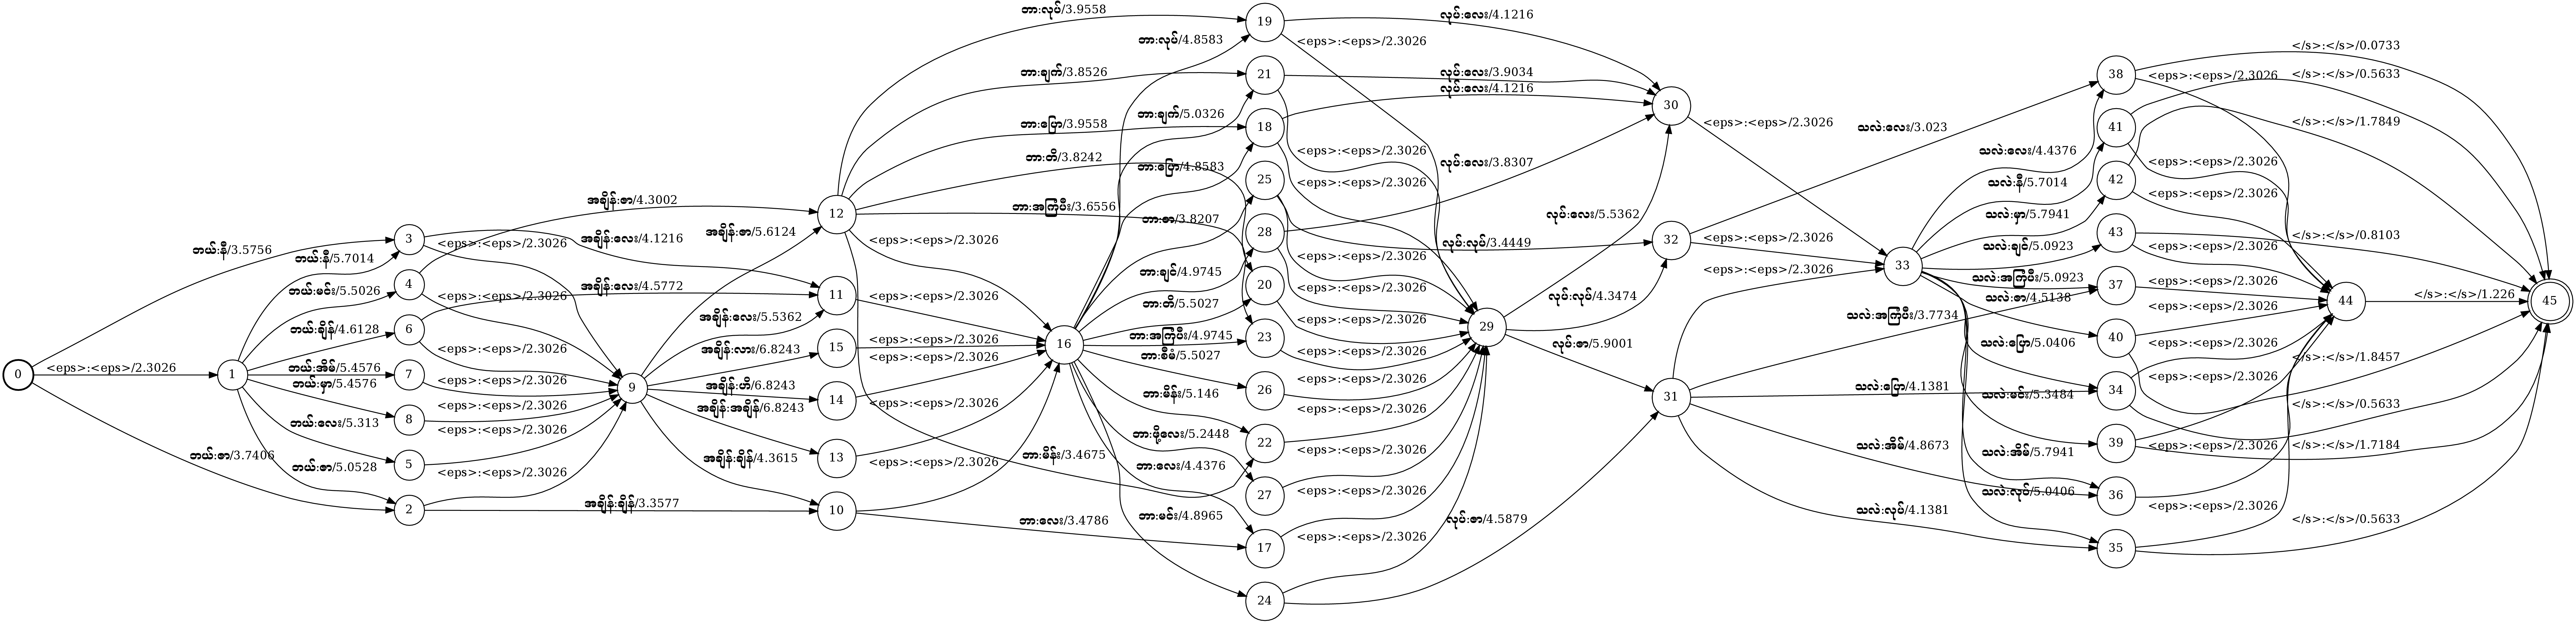

In [116]:
Image(filename="search_cropped.png")

<eps> ဖြုတ်ထားတဲ့ graph ကိုလည်း လေ့လာကြည့်ရအောင်။  

In [117]:
!fstdraw --portrait ./searchrmeps.fst | dot -Tpdf  -Gmargin=0 > ./searchrmeps.pdf 

In [118]:
!pdfcrop searchrmeps.pdf searchrmeps_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `searchrmeps_cropped.pdf'.


In [119]:
!convert -density 1000 searchrmeps_cropped.pdf -quality 100 searchrmeps_cropped.png

In [120]:
Image(filename="searchrmeps_cropped.png")

နောက်ဆုံး shortest-path ကို လေ့လာကြည့်ရအောင်...

In [121]:
!fstdraw --portrait ./shortest-path.fst | dot -Tpdf  -Gmargin=0 > ./shortest-path.pdf 

In [122]:
!pdfcrop shortest-path.pdf shortest-path_cropped.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `shortest-path_cropped.pdf'.


In [125]:
!convert -density 300 shortest-path_cropped.pdf -quality 100 shortest-path_cropped.png

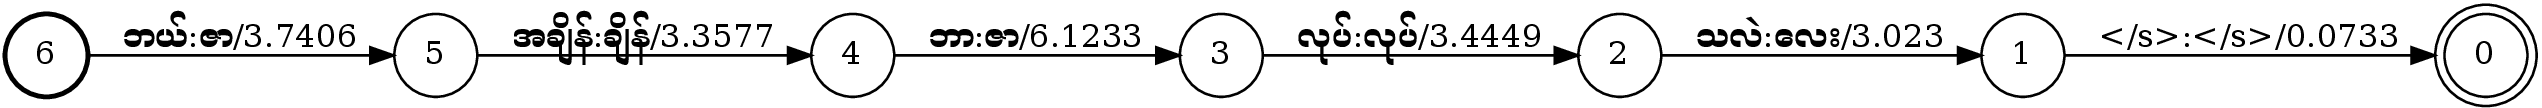

In [126]:
Image(filename="shortest-path_cropped.png")

## Summary

1. WFST framework ဖြစ်တဲ့ OpenFST command တွေနဲ့ IBM Model-1 alignment ရယ်၊ Bigram language model ရယ်ကို သုံးပြီး မြန်မာ-ရခိုင်အကြား machine translation ကို လက်တွေ့လုပ်ပြခဲ့ပါတယ်။  
2. FST မော်ဒယ်တွေကို graph အနေနဲ့ လေ့လာလို့ရအောင် visualization လုပ်ပြခဲ့ပါတယ်။


## References

1. Finite State Machines for NLP, Ye Kyaw Thu, 6 Dec 2019, [https://github.com/ye-kyaw-thu/NLP-Class/blob/master/slide/11-fsm4nlp.pdf](https://github.com/ye-kyaw-thu/NLP-Class/blob/master/slide/11-fsm4nlp.pdf)
2. Machine Translation and Sequence to Sequence Models: [Machine Translation and Sequence to Sequence Models](https://www.phontron.com/class/mtandseq2seq2017/)  
3. OpenFST Library: [https://www.openfst.org/twiki/bin/view/FST/WebHome](https://www.openfst.org/twiki/bin/view/FST/WebHome)  
4. Anymalign: [https://anymalign.limsi.fr/](https://anymalign.limsi.fr/)
5. Juan LUO, Jing SUN, Yves LEPAGE, Improving Sampling-based Alignment Method for
Statistical Machine Translation Tasks, IPSJ 17th Annual NLP Conference, 2011, pp. 186-189.[[Link]](https://www.anlp.jp/proceedings/annual_meeting/2011/pdf_dir/P1-7.pdf)
6. IBM Alignment Models: [https://en.wikipedia.org/wiki/IBM_alignment_models](https://en.wikipedia.org/wiki/IBM_alignment_models)
7. BLEU (bilingual evaluation understudy) score: [https://en.wikipedia.org/wiki/BLEU](https://en.wikipedia.org/wiki/BLEU)
8. chrF, a tool for calcualting character n-gram F score: [https://github.com/m-popovic/chrF](https://github.com/m-popovic/chrF)

## Citation

If you use this Jupyter Notebook for your teaching or as a baseline for research and development (R&D), please cite the following paper:  

Thazin Myint Oo, Thitipong Tanprasert, Ye Kyaw Thu, Thepchai Supnithi, "Transfer and Triangulation Pivot Translation Approaches for Burmese Dialects," in IEEE Access, vol. 11, pp. 6150-6168, 2023, doi: 10.1109/ACCESS.2023.3236804. (Received 15 October 2022, accepted 27 December 2022, date of publication 13 January 2023, date of current version 20 January 2023.) [[Link]](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10016703)